# EDA and Predictive Modelling for House Prices

In this project, I will perform extensive Exploratory Data Analysis on a set of house sales data from a residential real estate market. Based on the findings in EDA, I will build a linear regression model to predict the sales price of a house.

There are 2 datasets for this project. The first data is `training.csv` which contains all the data I need to train the model on. `testing.csv` contains the data that I will use to test the performance of the model that I built.

A description of the attributes is as follows:


|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|id         |Categorical|Nominal   |Contains duplicates - are these duplicate records or multiple sales of the same house? Can be dropped for the analysis.|
|price      |Numerical  |Continuous|Target variable - values range from 78000 to 6885000. Probably has outliers - especially high ones.| 
|bedrooms   |Numerical  |Discrete  |Values range from 0 to 10 - the majority are 3 and 4.                                 |
|bathrooms  |Numerical  |Discrete  |Has 26 values ranging from 0 to 8 - with most houses having 2.5, includes fractions - .25, .5 and .75.|
|sqft_living|Numerical  |Continuous|Ranges from 370 to 13540 - could have outliers                                        |
|sqft_lot   |Numerical  |Continuous|Ranges from 520 to 982998 - could have extreme outliers                               |
|waterfront |Categorical|Nominal   |Only has two values - the majority are 0; only 77 are 1                               |
|condition  |Categorical|Ordinal   |Has 5 values - range is 1 - 5                                                         |
|grade      |Categorical|Ordinal   |Has 13 values potential values - range 1 - 13, but 1 & 2 are not used in training data. The majority are 7 and 8.|
|yr_built   |Numerical  |Discrete  |Values range from 1900 to 2015.                                                       |
|zipcode    |Categorical|Nominal   |Has 70 values between 98001 and 98199.                                                 |


## Table of Content
1. [Exploratory Data Analysis](#1)
    - 1.1 [Univariate Analysis](#1.1)
    - 1.2 [Multivariate Analysis](#1.2)
2. [Model Building](#2)

In [7]:
#Load libraries
library(psych)
library(ggplot2)
library(reshape2)
library(car)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)

## 1. Exploratory Analysis <a class="anchor" id="1"></a>

In [3]:
#Load the training dataset
train<-read.csv('training.csv')

#Take a look at first and last few rows
head(train)
tail(train)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
5537200043,211000,4,1.00,2100,9200,0,3,7,1959,98168
2025700080,265000,3,2.50,1530,6000,0,4,7,1991,98038
2025049111,1440000,3,3.50,3870,3819,0,3,11,2002,98102
9482700075,800000,4,3.50,2370,3302,0,3,8,1926,98103
2856102105,1059500,5,3.25,3230,3825,0,3,9,2014,98117
3364900375,750000,2,1.00,1620,6120,0,3,7,1951,98115


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
9995,8945100320,136500,3,1.50,1420,8580,0,3,6,1962,98023
9996,3832500230,245000,4,2.25,2140,8800,0,4,7,1963,98032
9997,7351200050,1335000,4,1.75,2300,13342,1,3,7,1934,98125
9998,2301400325,760000,3,2.00,1810,4500,0,4,7,1906,98117
9999,1201500010,833000,4,2.50,2190,12690,0,3,8,1973,98033
10000,3709600190,370000,4,2.50,2130,4750,0,3,8,2009,98058


In [5]:
#Have a look at the structure of the data
str(train)

'data.frame':	10000 obs. of  11 variables:
 $ id         : num  5.54e+09 2.03e+09 2.03e+09 9.48e+09 2.86e+09 ...
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


In [8]:
#Some descriptive statistics of the data
summary(train)
describe(train)

       id                price            bedrooms        bathrooms    
 Min.   :1.000e+06   Min.   :  78000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2.126e+09   1st Qu.: 320000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :3.905e+09   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :4.591e+09   Mean   : 541434   Mean   : 3.373   Mean   :2.113  
 3rd Qu.:7.304e+09   3rd Qu.: 649950   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :9.842e+09   Max.   :6885000   Max.   :10.000   Max.   :8.000  
  sqft_living       sqft_lot        waterfront       condition    
 Min.   :  370   Min.   :   520   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 1430   1st Qu.:  5058   1st Qu.:0.0000   1st Qu.:3.000  
 Median : 1920   Median :  7620   Median :0.0000   Median :3.000  
 Mean   : 2080   Mean   : 14947   Mean   :0.0077   Mean   :3.407  
 3rd Qu.: 2545   3rd Qu.: 10642   3rd Qu.:0.0000   3rd Qu.:4.000  
 Max.   :13540   Max.   :982998   Max.   :1.0000   Max.   :5.000  
     grade           yr_bui

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,10000,4.590594e+09,2.868528e+09,3.905101e+09,4.510949e+09,3.562391e+09,1000102,9842300095,9841299993,0.2372750,-1.2612042,2.868528e+07
price,2,10000,5.414345e+05,3.683079e+05,4.500000e+05,4.833585e+05,2.224641e+05,78000,6885000,6807000,3.8714012,30.3971932,3.683079e+03
bedrooms,3,10000,3.372700e+00,9.126215e-01,3.000000e+00,3.340125e+00,1.482600e+00,0,10,10,0.5106973,1.7935620,9.126215e-03
bathrooms,4,10000,2.112775e+00,7.640739e-01,2.250000e+00,2.073437e+00,7.413000e-01,0,8,8,0.4537817,1.0037203,7.640739e-03
sqft_living,5,10000,2.080232e+03,9.158002e+02,1.920000e+03,1.986522e+03,8.154300e+02,370,13540,13170,1.4536920,5.4974336,9.158002e+00
sqft_lot,6,10000,1.494731e+04,3.863758e+04,7.620000e+03,8.234971e+03,3.884412e+03,520,982998,982478,10.5358139,167.0835521,3.863758e+02
waterfront,7,10000,7.700000e-03,8.741553e-02,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,11.2623190,124.8523153,8.741553e-04
condition,8,10000,3.406900e+00,6.509799e-01,3.000000e+00,3.303750e+00,0.000000e+00,1,5,4,0.9804674,0.5788908,6.509799e-03
grade,9,10000,7.657100e+00,1.184339e+00,7.000000e+00,7.584125e+00,1.482600e+00,3,13,10,0.7358365,1.0333597,1.184339e-02
yr_built,10,10000,1.970877e+03,2.945314e+01,1.975000e+03,1.972936e+03,3.409980e+01,1900,2015,115,-0.4604307,-0.6787418,2.945314e-01


There are no missing values, as all have 10000 observations.

#### Check for Duplicate IDs

In [9]:
duplicates <- aggregate(train$id, list(train$id), NROW)
duplicates <- train[train$id %in% duplicates[duplicates$x > 1,"Group.1"],]
head(duplicates[order(duplicates$id),],20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
8449,7200179,175000,2,1.00,840,12750,0,3,6,1925,98055
9679,7200179,150000,2,1.00,840,12750,0,3,6,1925,98055
9012,643300040,719521,4,1.75,1920,9500,0,4,7,1966,98006
9674,643300040,481000,4,1.75,1920,9500,0,4,7,1966,98006
614,1139600270,300000,3,2.75,2090,9620,0,3,8,1987,98023
5810,1139600270,310000,3,2.75,2090,9620,0,3,8,1987,98023
2683,1446403850,212000,2,1.00,790,7153,0,4,6,1944,98168
4643,1446403850,118125,2,1.00,790,7153,0,4,6,1944,98168
2032,1721801010,302100,3,1.00,1790,6120,0,3,6,1937,98146
3303,1721801010,225000,3,1.00,1790,6120,0,3,6,1937,98146


The prices are different - so they may represent the same house being sold more than once.

The ID is unlikely to be useful for further analysis, so remove it.

In [10]:
#Remove the ID
train<-train[,-1]

In [13]:
attach(train)

### 1.1 Univariate Analysis <a class="anchor" id="1.1"></a>

First, we investigate the distribution of each variable. We do this by looking at the boxplots and the histograms

No id variables; using all as measure variables


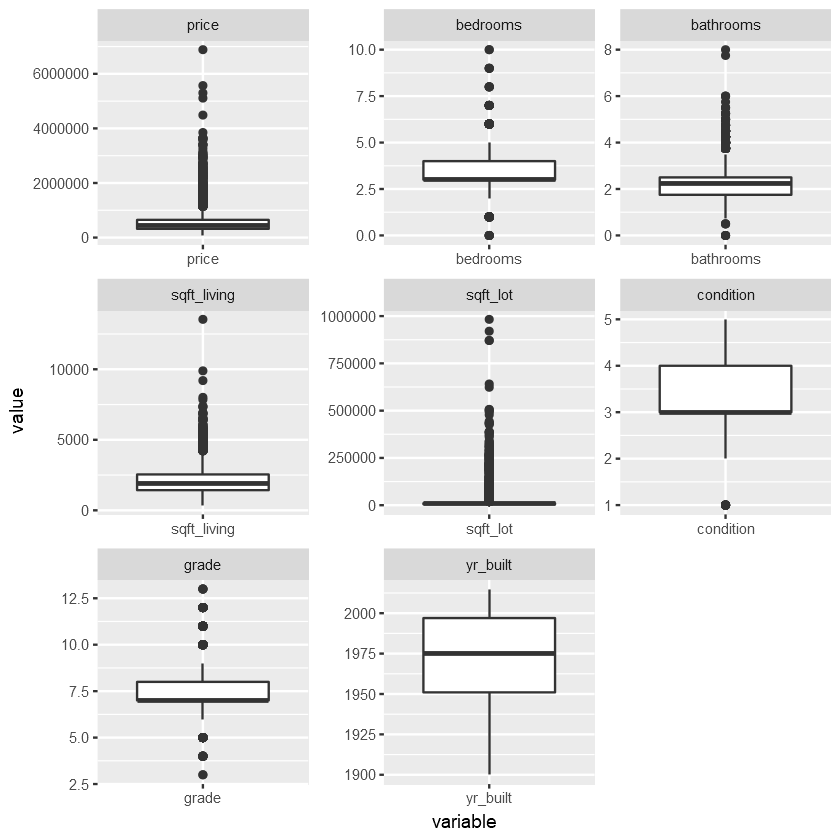

In [11]:
#reshape data for easy plotting
m1 <- melt(as.data.frame(train[,c(-6,-10)]))

#PLot boxplots
ggplot(m1,aes(x = variable,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

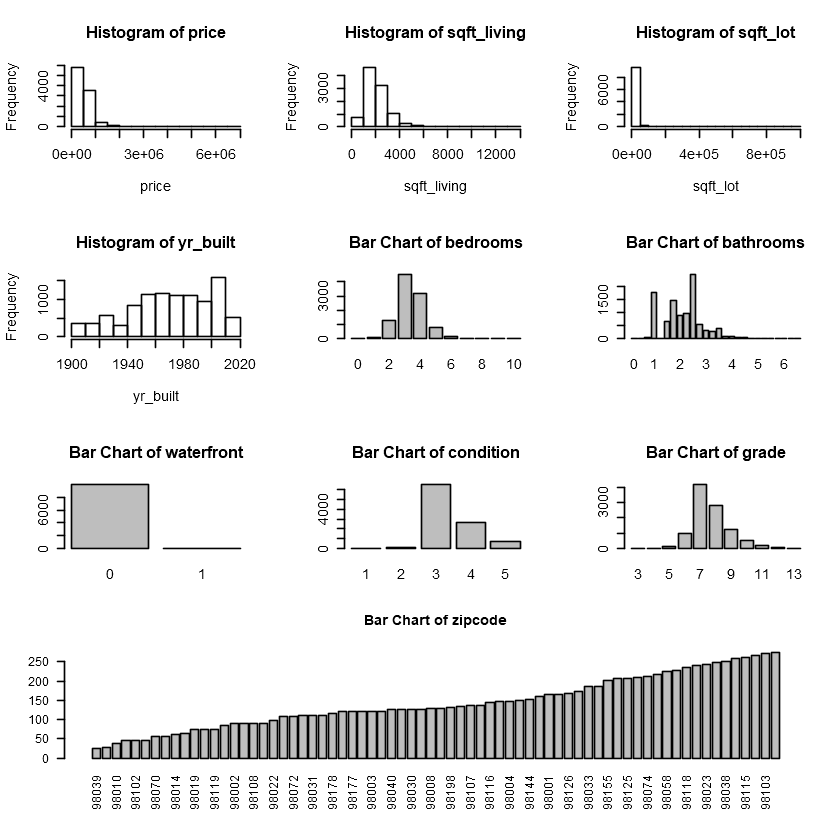

In [14]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,3))
hist(price)
hist(sqft_living)
hist(sqft_lot)
hist(yr_built)
plot(as.factor(bedrooms),main="Bar Chart of bedrooms") 
plot(as.factor(bathrooms),main="Bar Chart of bathrooms")
plot(as.factor(waterfront), main="Bar Chart of waterfront")
plot(as.factor(condition), main="Bar Chart of condition")
plot(as.factor(grade), main="Bar Chart of grade")

# plot zipcode on a separate row
par(fig=c(0,1,0,0.30),ps=10,new=TRUE)
barplot(sort(table(zipcode)),las=2,main="Bar Chart of zipcode")

These graphs show:
- Price, sqft_living and sqft_lot all have large positive skews
- Most houses have 2.5 bathrooms, other common values are 1 and 1.75.
- There are very few waterfront properties
- Most properties have condition of 3 or 4
- Most properties have grade of 7 or 8
- Few properties built between 1900 and 1940, fairly even spread from 1940 to 2000, an increase in properties built between 2000 and 2010
- The numbers of properties sold by zip code varies from about 25 to about 250

Next, we investigate some standout features, like `price`, `sqft_living`, `sqft_log` using a log scale to see if these variables have a log-normal distribution

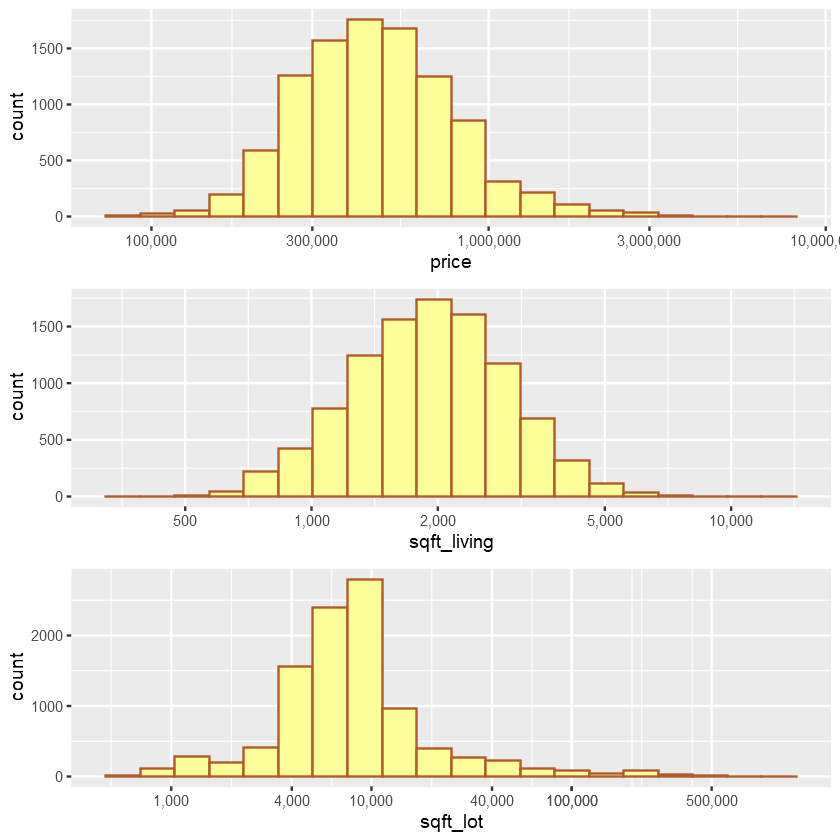

In [16]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p1 <- ggplot(aes(x=price), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(100000,300000,1000000,3000000,10000000)) 
p2 <- ggplot(aes(x=sqft_living), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(500,1000,2000,5000,10000))
p3 <- ggplot(aes(x=sqft_lot), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(1000,4000,10000,40000,100000,500000,100000))
grid.arrange(p1, p2, p3, ncol=1, nrow=3)

These graphs show:
- The log of price and sqft_living are (nearly) normally distributed.
- The log of the sqft_lot is not quite normal. The majority of lot sizes are between 4000 and 10,000 sqft, with a few outliers > 100,000 sqft

There was a drop in sales of houses built during the 1930's and an increase in sales of houses built during the 2000's. The following graphs provide a closer look at sales for these years.

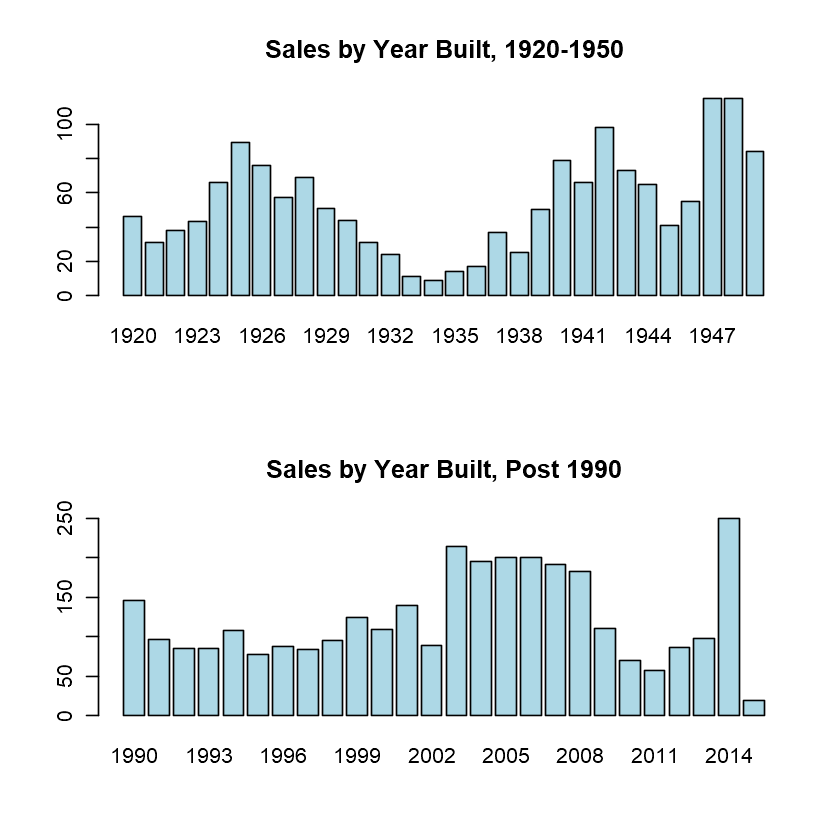

In [17]:
par(mfrow=c(2,1))
plot(as.factor(yr_built[yr_built >= 1920 & yr_built < 1950]),
     main = "Sales by Year Built, 1920-1950", col="lightblue")
plot(as.factor(yr_built[yr_built >= 1990]),
     main = "Sales by Year Built, Post 1990", col="lightblue")

There were very few houses sold that were built between 1933 and 1936 - these were depression years so maybe fewer houses were built. Then there was an increase in sales for houses built during WWII (so this data is probably not for a European city) and a spike during the post-war years of 1947 and 1948.

There was a jump in the number of houses sold that were built in 2003 to 2008. These houses were between six and twelve years old when they were sold. Fewer houses built between 2009 and 2013 were sold. These figures indicate that owners of new homes tend to own the house for at least six years before reselling. The sales volume of houses built in 2014 and 2015 show that about 2.5% of sales were for new houses.

One possible anomaly in the data is that there are houses with no bedrooms and/or no bathrooms. Take a closer look at these records.

In [19]:
train[bedrooms == 0 | bathrooms == 0,]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
37,139950,0,0.00,844,4269,0,4,7,1913,98001
987,235000,0,0.00,1470,4800,0,3,7,1996,98065
1295,355000,0,0.00,2460,8049,0,3,8,1990,98031
3523,265000,0,0.75,384,213444,0,3,4,2003,98070
4110,380000,0,0.00,1470,979,0,3,8,2006,98133
7081,339950,0,2.50,2290,8319,0,3,8,1985,98042
8099,280000,1,0.00,600,24501,0,2,3,1950,98045


These looks very strange. The first record describes a house with no bedrooms and no bathrooms but is in above average condition and of average grade. Record 7081 describes a house with no bedrooms but 2.5 bathrooms, so would suit a very clean person who doesn't sleep! Most (if not all) of these are likely to contain erroneous data.

### 1.2 Multivariate Analysis <a class="anchor" id="1.2"></a>

## 2. Model Building <a class="anchor" id="2"></a>